# STATS 607
## Week 5.1: Cluster computing

In [2]:
pip install wetterdienst

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.2/227.2 kB 4.0 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 9.8 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.6 MB/s eta 0:00:00m eta 0:00:010:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 11.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 8.2 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 4.2 MB/s eta 0:00:0031m11.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.5 MB/s eta 0:00:00
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━

  Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.2.0
    Uninstalling Pillow-9.2.0:
      Successfully uninstalled Pillow-9.2.0

[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from wetterdienst import Wetterdienst

Wetterdienst.discover()

{'DWD': ['OBSERVATION', 'MOSMIX', 'DMO', 'ROAD', 'RADAR'],
 'ECCC': ['OBSERVATION'],
 'IMGW': ['HYDROLOGY', 'METEOROLOGY'],
 'NOAA': ['GHCN'],
 'WSV': ['PEGEL'],
 'EA': ['HYDROLOGY'],
 'NWS': ['OBSERVATION'],
 'EAUFRANCE': ['HUBEAU'],
 'GEOSPHERE': ['OBSERVATION']}

In [6]:
API = Wetterdienst(provider="noaa", network="ghcn")

In [155]:
import datetime as dt
from wetterdienst import Resolution, Period
from wetterdienst.provider.noaa.ghcn import NoaaGhcnRequest, NoaaGhcnParameter


request = NoaaGhcnRequest(
    parameter=["TMAX"],
    resolution=NoaaGhcnParameter.DAILY,
    start_date=dt.datetime(1980, 1, 1),
    end_date=dt.datetime(2021, 1, 20)
)

request

NoaaGhcnRequest(parameter=[(tmax/daily)], resolution=daily, period=[historical], start_date=1980-01-01 00:00:00+00:00, end_date=2021-01-20 00:00:00+00:00, humanize=True, format=long, si_units=True)

In [158]:
a2 = (42.2808, -83.7430)
# stations = request.filter_by_distance(latlon=a2, distance=200, unit="mi")
stations.df

station_id,start_date,end_date,latitude,longitude,height,name,state,distance
str,"datetime[μs, UTC]","datetime[μs, UTC]",f64,f64,f64,str,str,f64
"""USC00200220""",2008-01-01 00:00:00 UTC,2013-12-31 00:00:00 UTC,42.2875,-83.7611,263.7,"""ANN ARBOR 1W""","""MI""",1.664958
"""US1MIWS0016""",2008-01-01 00:00:00 UTC,2012-12-31 00:00:00 UTC,42.2973,-83.7315,245.1,"""ANN ARBOR 1.5 N""","""MI""",2.064226
"""US1MIWS0020""",2012-01-01 00:00:00 UTC,2015-12-31 00:00:00 UTC,42.2998,-83.7392,257.3,"""ANN ARBOR 1.7 NNW""","""MI""",2.135701
"""US1MIWS0015""",2008-01-01 00:00:00 UTC,2010-12-31 00:00:00 UTC,42.2865,-83.7699,274.0,"""ANN ARBOR 2.1 WNW""","""MI""",2.301895
"""US1MIWS0011""",2008-01-01 00:00:00 UTC,2024-12-31 00:00:00 UTC,42.2832,-83.7715,275.5,"""ANN ARBOR 2.1 WNW""","""MI""",2.359741
…,…,…,…,…,…,…,…,…
"""USC00200662""",1948-01-01 00:00:00 UTC,1951-12-31 00:00:00 UTC,44.9758,-85.1981,190.5,"""BELLAIRE""","""MI""",321.727548
"""CA1ON000477""",1998-01-01 00:00:00 UTC,2023-12-31 00:00:00 UTC,43.0714,-79.9567,190.2,"""CALEDONIA 0.3 NW - GRCA""","""ON""",321.739383
"""US1INLK0041""",2009-01-01 00:00:00 UTC,2015-12-31 00:00:00 UTC,41.3323,-87.411,212.4,"""LOWELL 2.6 N""","""IN""",321.762549


In [164]:
import pandas as pd
# inv = pd.read_fwf("https://www.ncei.noaa.gov/pub/data/ghcn/daily/ghcnd-inventory.txt", 
#                  names=["station_id", "lat", "long", "variable", "start_year", "end_year"])
inv

,station_id,lat,long,variable,start_year,end_year
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949
...,...,...,...,...,...,...
756934,ZI000067983,20.2000,32.6160,PRCP,1951,2024
756935,ZI000067983,20.2000,32.6160,TAVG,1962,2024
756936,ZI000067991,22.2170,30.0000,TMAX,1951,1990
756937,ZI000067991,22.2170,30.0000,TMIN,1951,1990


In [175]:
inv.query("variable == 'TMAX'")

,station_id,lat,long,variable,start_year,end_year
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
11,ACW00011647,17.1333,-61.7833,TMAX,1961,1961
18,AE000041196,25.3330,55.5170,TMAX,1944,2024
22,AEM00041194,25.2550,55.3640,TMAX,1983,2024
26,AEM00041217,24.4330,54.6510,TMAX,1983,2024
...,...,...,...,...,...,...
756921,ZI000067969,21.0500,29.3670,TMAX,1962,1990
756924,ZI000067975,20.0670,30.8670,TMAX,1951,2024
756929,ZI000067977,21.0170,31.5830,TMAX,1968,1990
756932,ZI000067983,20.2000,32.6160,TMAX,1951,2020


In [180]:
import polars as pl

mucho_data = stations.df.join(
    pl.from_pandas(
        inv.query("variable == 'TMAX'")), on="station_id").filter(
    pl.col("start_year") < 1980, pl.col("end_year") > 2020
)

mucho_data

station_id,start_date,end_date,latitude,longitude,height,name,state,distance,lat,long,variable,start_year,end_year
str,"datetime[μs, UTC]","datetime[μs, UTC]",f64,f64,f64,str,str,f64,f64,f64,str,i64,i64
"""CA006124127""",1870-01-01 00:00:00 UTC,2022-12-31 00:00:00 UTC,44.1667,-81.6167,200.0,"""KINCARDINE""","""ON""",271.378197,44.1667,-81.6167,"""TMAX""",1872,2022
"""CA006134190""",1960-01-01 00:00:00 UTC,2024-12-31 00:00:00 UTC,42.05,-82.6667,200.0,"""KINGSVILLE MOE""","""ON""",92.344379,42.05,-82.6667,"""TMAX""",1968,2024
"""CA006135583""",1957-01-01 00:00:00 UTC,2024-12-31 00:00:00 UTC,42.5167,-81.6333,198.0,"""NEW GLASGOW""","""ON""",175.205988,42.5167,-81.6333,"""TMAX""",1957,2024
"""CA006139520""",1866-01-01 00:00:00 UTC,2024-12-31 00:00:00 UTC,42.3333,-82.9333,188.0,"""WINDSOR RIVERSIDE""","""ON""",66.840043,42.3333,-82.9333,"""TMAX""",1866,2024
"""CA006142285""",1969-01-01 00:00:00 UTC,2024-12-31 00:00:00 UTC,43.65,-80.4167,376.0,"""ELORA RESEARCH STN""","""ON""",310.503205,43.65,-80.4167,"""TMAX""",1969,2024
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""USW00094830""",1955-01-01 00:00:00 UTC,2024-12-31 00:00:00 UTC,41.5869,-83.8053,205.4,"""TOLEDO EXPRESS AP""","""OH""",77.330062,41.5869,-83.8053,"""TMAX""",1955,2024
"""USW00094847""",1942-01-01 00:00:00 UTC,2024-12-31 00:00:00 UTC,42.2311,-83.3311,192.0,"""DETROIT METRO AP""","""MI""",34.347144,42.2311,-83.3311,"""TMAX""",1958,2024
"""USW00094849""",1916-01-01 00:00:00 UTC,2024-12-31 00:00:00 UTC,45.0717,-83.5644,208.2,"""ALPENA CO RGNL AP""","""MI""",310.665893,45.0717,-83.5644,"""TMAX""",1916,2024


In [181]:
stations = mucho_data['station_id'].to_list()

open("snakemake/stations.txt", "wt").write("\n".join(stations))

1847

In [184]:
request = NoaaGhcnRequest(
        parameter=["TMAX"],
        resolution=NoaaGhcnParameter.DAILY,
        start_date=dt.datetime(1980, 1, 1),
        end_date=dt.datetime(2021, 1, 20)
)
stations = request.filter_by_station_id(station_id='CA006124127')
list(stations.values)

TypeError: 'NoaaGhcnValues' object is not iterable

/var/folders/b1/jjpl1p_53jxggrgr9nn841nm0000gn/T/ipykernel_63076/899351193.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["date"] = df["date"].dt.to_period("M")


<AxesSubplot: xlabel='date'>

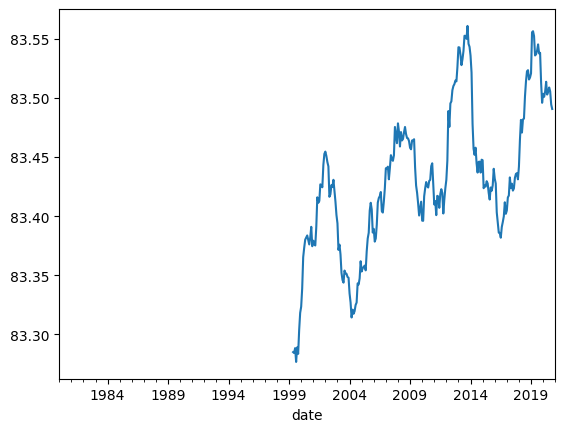

In [188]:
#  res = next(stations.values.query())
df = res.df.to_pandas()

df["date"] = df["date"].dt.to_period("M")
series = df.groupby(['date']).agg(dict(value="mean"))["value"] / 10.
series = series * 1.8 + 32
series.rolling(window=48).mean().plot()

## Examining data

In [52]:
!pwd

/Users/terhorst/University of Michigan Dropbox/Jonathan Terhorst/Teaching/STATS/607/repo/lectures/week5


/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/pty.py:85: RuntimeWarning: Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and crashes.

The most likely reason you are seeing this error is because you are using the
multiprocessing module on Linux, which uses fork() by default. This will be
fixed in Python 3.14. Until then, you want to use the "spawn" context instead.

See https://docs.pola.rs/user-guide/misc/multiprocessing/ for details.

  pid, fd = os.forkpty()


In [53]:
full_df = pd.read_pickle("snakemake/data/combined.pkl")

ModuleNotFoundError: No module named 'numpy._core'

In [12]:
df.groupby("date")["value"].mean() / 10

date
1980-01    27.319722
1980-02    27.177919
1980-03    27.789281
1980-04    28.644142
1980-05    29.497214
             ...    
2020-09    29.631766
2020-10    28.858261
2020-11    28.563164
2020-12    27.662055
2021-01    27.510219
Freq: M, Name: value, Length: 493, dtype: float64

In [15]:
series = df.groupby("date")["value"].mean() / 10

<Axes: xlabel='date'>

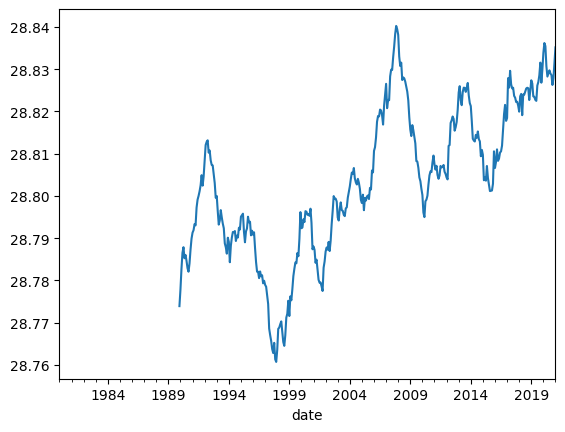

In [21]:
series.rolling(window=120).mean().plot()

## Hierarchical model

For each station $i$, observed temperature $y_{it}$ at time $t$ is modeled as:
$$
y_{it} = \beta_{i,0} + \beta_{i,1} t + \epsilon_{it}, \quad \epsilon_{it} \sim \mathcal{N}(0, \sigma_i^2)
$$
where:
- $\beta_{i,0}$: Station-specific intercept,
-  $\beta_{i,1}$: Station-specific trend (slope),
- $\sigma_i^2$: Station-specific variance.



Priors for station-level parameters:

$$
\begin{align}
\beta_{i,1} & \sim \mathcal{N}(\mu_{\text{region}}, \tau^2) \\
\beta_{i,0} & \sim \mathcal{N}(0, 10^2)  \\
\sigma_i &\sim \text{Half-Cauchy}(0, 5)
\end{align}
$$

## Regional means
We will borrow strength across different stations by imposing region-level correlations:

$$
\mu_{\text{region}} \sim \mathcal{N}(\mu_{\text{global}}, \sigma_{\text{region}}^2)
$$
where:
-  $\mu_{\text{region}}$: Mean trend for the region,
- $\sigma_{\text{region}}^2$: Variance in trends across regions.


## Global mean
The global trend is modeled as:
$$
\begin{align}
\mu_{\text{global}} &\sim \mathcal{N}(0, 10^2) \\
\sigma_{\text{region}} &\sim \text{Half-Cauchy}(0, 5)
\end{align}
$$


## Full model



$$
\begin{align}
y_{it} &\sim \mathcal{N}(\beta_{i,0} + \beta_{i,1} t, \sigma_i^2) \\
\beta_{i,1} &\sim \mathcal{N}(\mu_{\text{region}}, \tau^2) \\
\mu_{\text{region}} &\sim \mathcal{N}(\mu_{\text{global}}, \sigma_{\text{region}}^2) \\
\mu_{\text{global}} &\sim \mathcal{N}(0, 10^2) \\
\sigma_i, \sigma_{\text{region}}, \tau &\sim \text{Half-Cauchy}(0, 5)
\end{align}
$$


In [64]:
import numpyro
import numpyro.distributions as dist

def hierarchical_model(year, temperature, station_idx, n_stations):
    # Global-level parameters
    mu_global = numpyro.sample("mu_global", dist.Normal(0, 10))
    sigma_region = numpyro.sample("sigma_region", dist.HalfCauchy(5))
    
    # Region-level trend (for simplicity, modeled as a single region)
    mu_region = numpyro.sample("mu_region", dist.Normal(mu_global, sigma_region))
    
    # Station-level parameters
    tau_station = numpyro.sample("tau_station", dist.HalfCauchy(5))
    beta_1_station = numpyro.sample("beta_1_station", dist.Normal(mu_region, tau_station).expand([n_stations]))
    beta_0_station = numpyro.sample("beta_0_station", dist.Normal(0, 10).expand([n_stations]))
    sigma_station = numpyro.sample("sigma_station", dist.HalfCauchy(5).expand([n_stations]))
    
    # Observation model
    temperature_hat = beta_0_station[station_idx] + beta_1_station[station_idx] * year
    numpyro.sample("obs", dist.Normal(temperature_hat, sigma_station[station_idx]), obs=temperature)

In [54]:
summary_df = df.groupby(["station_id", "date"]).agg({'value': 'mean'}).reset_index().dropna()

In [48]:
df

,station_id,dataset,parameter,date,value,quality
0,CA006124127,daily,temperature_air_max_2m,1980-01,NaN,NaN
1,CA006124127,daily,temperature_air_max_2m,1980-01,NaN,NaN
2,CA006124127,daily,temperature_air_max_2m,1980-01,NaN,NaN
3,CA006124127,daily,temperature_air_max_2m,1980-01,NaN,NaN
4,CA006124127,daily,temperature_air_max_2m,1980-01,NaN,NaN
...,...,...,...,...,...,...
14990,CA006124127,daily,temperature_air_max_2m,2021-01,277.15,NaN
14991,CA006124127,daily,temperature_air_max_2m,2021-01,NaN,NaN
14992,CA006124127,daily,temperature_air_max_2m,2021-01,275.65,NaN
14993,CA006124127,daily,temperature_air_max_2m,2021-01,273.15,NaN


In [83]:
y = summary_df['value'].values
t = summary_df['date'].astype('int').values

In [84]:
# Encode station IDs as integers
stations = summary_df['station_id'].unique()
station_idx = {s: i for i, s in enumerate(stations)}
summary_df['station_idx'] = summary_df['station_id'].map(station_idx)
station_idx = summary_df['station_idx'].values

In [85]:
n_stations = len(stations)

In [ ]:
from numpyro.infer import MCMC, NUTS, Predictive

nuts_kernel = NUTS(hierarchical_model)
mcmc = MCMC(nuts_kernel, num_warmup=1000, num_samples=1000)

# Random number seed
import jax

rng_key = jax.random.PRNGKey(0)

# Run MCMC
mcmc.run(rng_key, year=t, temperature=y, station_idx=station_idx, n_stations=n_stations)

# Extract samples
posterior_samples = mcmc.get_samples()

In [1]:
from numpyro.infer import SVI, Trace_ELBO

# Define the guide
guide = numpyro.infer.autoguide.AutoNormal(hierarchical_model)

NameError: name 'numpyro' is not defined